# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Research">Research Questions</a></li> 
<li><a href="#cleaning">Data Cleaning</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
>### Dataset Description 

> In this project we will be analyzing data associated with the patients show up rate to their appointment, we will be interested in finding trends among the paitents that show up and those that do not show up.

>This dataset collects information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 

>● ScheduledDay - tells us on what day the patient set up their appointment. 

>● Neighborhood - indicates the location of the hospital. 

>● Scholarship - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 

>● PatientId - Patient Identification number 

>● AppointmentID - Identification of each appointment 

>● Gender - Male or Female. 

>● AppointmentDay - The day of the actuall appointment, when they have to visit the doctor. 

>● Age - How old is the patient. 

>● Hipertension - Indicates if the paitient is hypertensive or not 

>● Diabetes - Indicates if the paitient is diabetic or not. 

>● Alcoholism - Tells if the patient has a drinking problem or not 

>● Handcap - tells if the patient is handicap or not 

>● SMS_received - tells if the patient was sent a message or not. 

>● No-show - Patients who showed up or missed their appointment (Yes = did not show up; No = showed up)

>● 0 indicates False and 1 indicates True

In [74]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, assess, trim and clean your dataset for analysis. 
### General Properties

In [75]:
# Load your data and print out a few lines.
df = pd.read_csv('no_show_appointments.csv')

#Viewing a sample of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='Research'></a>
## Research Questions

> Question 1: What is the percentage of paitents wthat showed up as against those that did not show up ?

> Question 2: What gender visits the hospital most? 

> Question 3: What gender shows up most for their appointment?

> Question 4: What effect does scholarship have on patient show up rate? 

> Question 5:What effect does sending SMS have on patients showing up to their appointment?

> Question 6: What  effect does disease have on show up rate of paitents?

> Question 7: What effect does the difference in the schedule day and appointment day have on show up rate?

> Question 8: What age group shows up most and least to their appointment?

> Question 9: What factors are important for us to know in order to perdict if a patient shows up for their scheduled appointment?

In [76]:
#checking for the number of columns and row in the dataset
df.shape

(110527, 14)

In [77]:
#checking for duplicates in the dataset
print(df.duplicated().sum())

0


In [78]:
#checking for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [79]:
#checking the datatypes.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [80]:
# checking for the column names in the dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [81]:
#checking for uquie variables in the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [82]:
# Using the describe function to get the summary statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Assessment Report

> The dataset contains 110,527 rows and 14 columns.
> There are no duplicates and no missing value in the dataset.
> From the summary statistics above we can see that the age of paitents fall within the range of less than a year old and and the oldest paitent is 115 yeasrs old.
> The majority of paitents are aged between 18-55 years old and paitients within this age range do not have scholarship, hipertension, diabetes, alcoholism and are not handicap.

> The AppointmentID is an extraneous column for the research questions in this analysis, hence will be dropped.
> The appointmentDay and ScheduleDay column will be splited and the datatype will be converted to date

> The column name No-show will be renamed to No_show as a proper naming convention.

> some of the column names are mispelled so we will be correcting them

> The handicap column contains five variables instead of 2(0,1), we will be dropping all other variables.

> The age column carries variables with values less than 1, hence we will be dropping these rows because age does not carry a negative value, however we will allow ages 0 for todlers.

> we will be grouping the age of patienties into categories to aid the analysis.


<a id='cleaning'></a>
### Data Cleaning
> In this section we will be cleaning the datset to prepare the data for analysis.

In [83]:
# spilting the ( appointment day and scheduledday columns)
# columns to split by "T"
split_columns = ['AppointmentDay', 'ScheduledDay']

# apply split function to neccessary column of the dataframe
for c in split_columns:
    df[c] = df[c].apply(lambda x: x.split("T")[0])

In [1]:
#confriming the split
df.head(2)

NameError: name 'df' is not defined

In [85]:
#converting columns 'appointmentday' and 'scheduleday' string to datetime datatype
df['AppointmentDay'] =pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] =pd.to_datetime(df['ScheduledDay'])
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [86]:
# Getting the differnce in days between the appointmentday and scheduleday
Days = (df['AppointmentDay'] -  df['ScheduledDay']).dt.days
Days

0          0
1          0
2          0
3          0
4          0
5          2
6          2
7          2
8          0
9          2
10         2
11         3
12         1
13         1
14         1
15         3
16         1
17         1
18         3
19         0
20         2
21         2
22         4
23         1
24         0
25         3
26         0
27         2
28         0
29         0
          ..
110497     0
110498     0
110499     0
110500     0
110501     0
110502     0
110503     0
110504     0
110505     0
110506     0
110507     0
110508     0
110509     0
110510     0
110511     0
110512     0
110513     0
110514     0
110515     2
110516     1
110517     0
110518    41
110519    41
110520    35
110521    35
110522    35
110523    35
110524    41
110525    41
110526    41
Length: 110527, dtype: int64

In [87]:
#appending the new column(days) to the dataset
df['Days'] = Days
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0


In [88]:
#Droping the extraneouns coloums (AppointmentID)
df.drop(['AppointmentID'], axis=1, inplace=True)

In [89]:
#confriming the changes
df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0


In [90]:
#renaming the the No-show column to No_show for uniformity
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
df.rename(columns = {'Handcap':'Handicap'}, inplace = True)

#confriming changes
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Days
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [91]:
#dropping rows that contain 2,3,4 in the handicap column

df.drop(df[df['Handicap'] >= 2].index, inplace = True)

#confriming changes
df.Handicap.nunique()

2

In [92]:
df.drop(df[df['Age'] < 0].index, inplace = True)

In [93]:
df.Age.describe()

count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [94]:
#Creating a new columns for the age category 
def Age_category(col):
    if (col >= 0) & (col <=5):
        return 'Infants'
    elif (col >= 6) & (col <=12):
        return 'Children'
    elif (col >= 13) & (col <=19):
        return 'Teenager'
    elif (col >= 20) & (col <=40):
        return 'Young_Aldut'
    elif (col >= 41) & (col <=60):
        return 'Alduts'
    elif (col >= 61) & (col <=80):
        return 'Old'
    else:
        return 'Senior'

# Adding the new column to the dataframe   
df['Age Category'] = df['Age'].apply(Age_category)

#Confriming addition of column    
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Days,Age Category
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Old
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Alduts
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Old
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Children
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Alduts


<a id='eda'></a>
## Exploratory Data Analysis

> We have trimmed and cleaned the data and its ready for exploration. we will create visualizations with the goal of addressing the research questions posed in the introduction section. we will compiute relevant statistics and analysis.

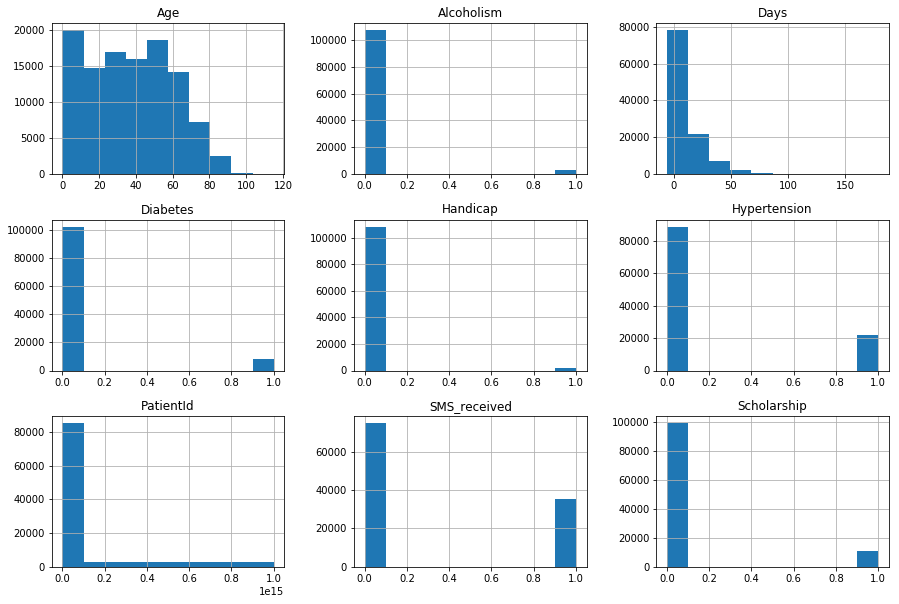

In [95]:
#viewing hsitogram for all numerical data in the dataframe
df.hist(figsize = (15,10));

In [96]:
#finding the mean value for each variable by no_show
No_show_mean = df.groupby('No_show').mean()
No_show_mean

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Days
No_show,,,,,,,,,
No,1.477015e+14,37.777090,0.093880,0.204068,0.073573,0.030404,0.019035,0.291429,8.758986
Yes,1.468248e+14,34.279109,0.115675,0.168238,0.063830,0.030299,0.016429,0.438774,15.830775


> By grouping the variables by No_show we can infer that Paitents with diseases are less likely to show up to their appointment.


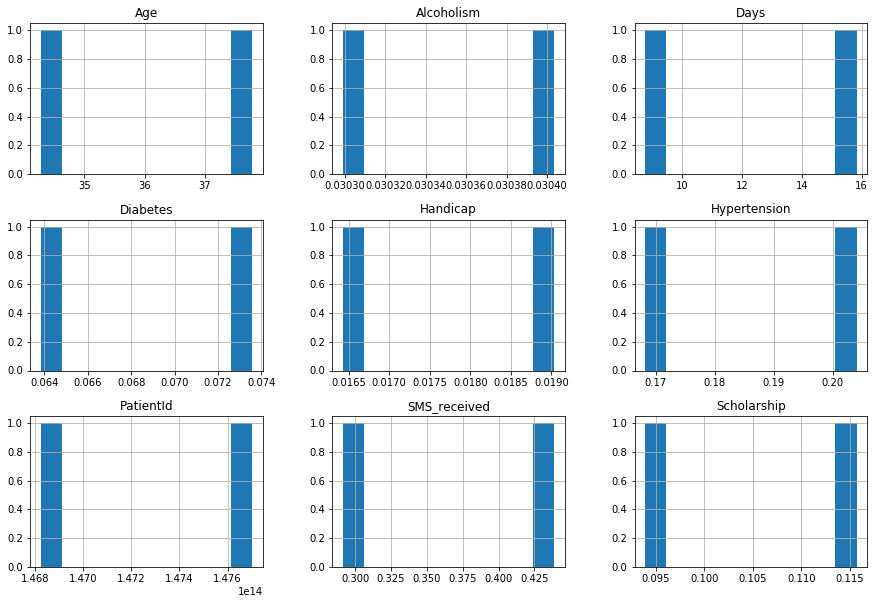

In [97]:
##Viewing the plots of the mean of patiemts who showed up and those that did not show up
No_show_mean.hist(figsize = (15,10));

### What is the Proportion and Percentage of paitents wthat showed up as against those that did not show up?

In [98]:
#getting the total of patients by unique patient ID
total= df.PatientId.count()
total

110327

In [99]:
# Find the count value of paitients who showed up as against those who didn't with groupby
No_show = df.groupby('No_show').No_show.count()
No_show

No_show
No     88049
Yes    22278
Name: No_show, dtype: int64

In [100]:
#getting the proportion of patients who showed up
prop = No_show/total
prop

No_show
No     0.798073
Yes    0.201927
Name: No_show, dtype: float64

In [102]:
# creating a function for vizualization
def label(x,y,z):
    plt.title(x)
    plt.xlabel(y)
    plt.ylabel(z)
    plt.show()

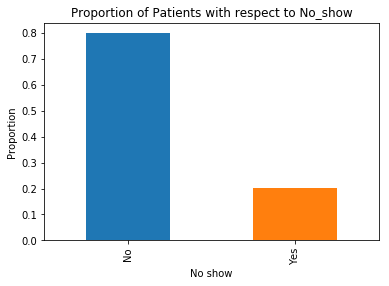

In [103]:
#Visualizing the proportion
prop.plot(kind='bar')
label('Proportion of Patients with respect to No_show', "No show", "Proportion")


In [104]:
#getting the percentage of patients who showed up
percentage = No_show/total*100
percentage

No_show
No     79.8073
Yes    20.1927
Name: No_show, dtype: float64

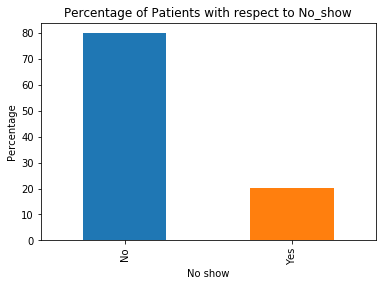

In [105]:
#vizualising the percentage
percentage.plot(kind='bar')
label('Percentage of Patients with respect to No_show', "No show", "Percentage")

> From the plots above it is evident that the ratio and percentage of paitents that show up to their appointment is higher than those that do not show up with the percentage of paitents that show up at 80% and those that did not show at 20%

###  What gender visits the hospital most?

In [106]:
# Grouping gender
TotalGender = df.groupby('Gender').Gender.count()
TotalGenderTotalGender = df.groupby('Gender').Gender.count()
TotalGender

Gender
F    71730
M    38597
Name: Gender, dtype: int64

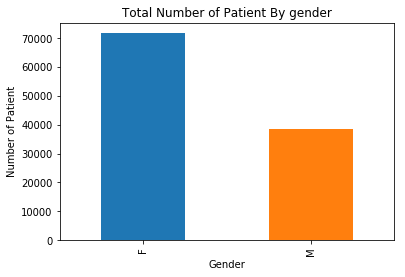

In [107]:
#Plotting the chart of gender
TotalGender.plot(kind='bar')
label('Total Number of Patient By gender', "Gender", "Number of Patient")

In [108]:
#Getting the percentage of paitents by Gender
G_percent = TotalGender/total*100
G_percent

Gender
F    65.015817
M    34.984183
Name: Gender, dtype: float64

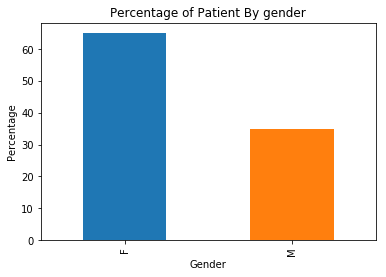

In [109]:
#plotting the percentage gender
G_percent.plot(kind='bar')
label('Percentage of Patient By gender', "Gender", "Percentage")

> From the plots above we can deduce that the female gender visits the hospital more than the male gender.

### What Gender shows up more to thier appointment?

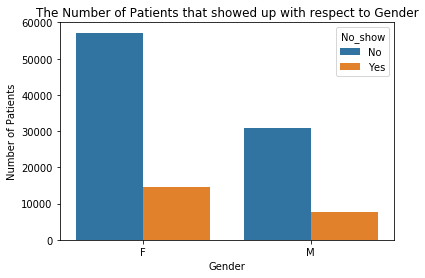

In [110]:
#Visualizing what gender shows up more to their appointment
sns.countplot(x = 'Gender', data = df, hue = 'No_show')
label('The Number of Patients that showed up with respect to Gender', "Gender", "Number of Patients")

> The plot above shows that the female gender shows up more to their appointment.

### What effect does scholarship have on patient show up rate?

In [37]:
#checking for the number of patients that have scholarship
Scholarship = df.groupby('Scholarship').Scholarship.count()
Scholarship

Scholarship
0    99484
1    10843
Name: Scholarship, dtype: int64

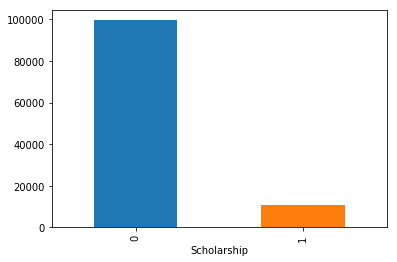

In [38]:
#visualizing the scholarship of paitents
Scholarship.plot(kind = 'bar');

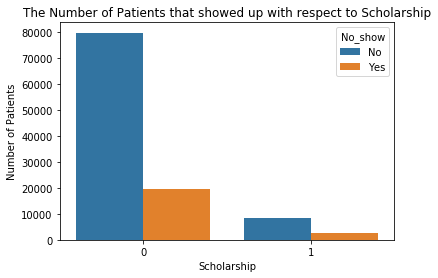

In [39]:
#checking for how schholarships affects show up rate
sns.countplot(x = 'Scholarship', data = df, hue = 'No_show')
label('The Number of Patients that showed up with respect to Scholarship', "Scholarship", "Number of Patients")

>The plots above shows that patients enrolled in Brasilian welfare program are less than those who are not enrolled in the programe.

> Those without the scholarship tends to show up more.

###  What effect does sending SMS have on patients showing up to their appointment?

In [40]:
#checking for the number of patients that have recieved sms
SMS_received = df.groupby('SMS_received').SMS_received.count()
SMS_received

SMS_received
0    74892
1    35435
Name: SMS_received, dtype: int64

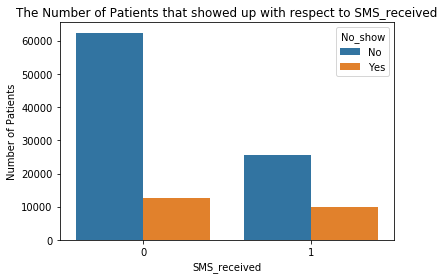

In [41]:
#checking for how SMS_received affects show up rate
sns.countplot(x = 'SMS_received', data = df, hue = 'No_show')
label('The Number of Patients that showed up with respect to SMS_received', "SMS_received", "Number of Patients")

> SMS_received has little to no effect on show up rate as the plot above shows that paitents who did not recieve the sms showed up more than those who did.

### What is the relationship between the difference between appointment day and schedule day and No_show?

In [42]:
# get the median amount of days content
df.Days.median()

4.0

In [43]:
# select samples of paitents with appointment days less than the median
less_days = df.query('Days < 4')

# select samples of paitents with appointment days less than the median
high_days = df.query('Days >= 4')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == less_days['No_show'].count() + high_days['No_show'].count() # should be True

True

In [44]:
# get mean no show rating for the low days and high days groups
less_days.No_show.count(), high_days.No_show.count()

(53136, 57191)

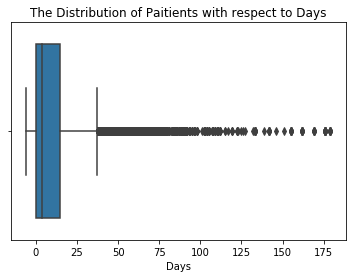

In [45]:
#show up days by days between appointment
sns.boxplot(x = 'Days', data = df, hue = 'No_show')
plt.title('The Distribution of Paitients with respect to Days')
plt.show();

In [46]:
df.groupby(['No_show'])['Days'].mean()

No_show
No      8.758986
Yes    15.830775
Name: Days, dtype: float64

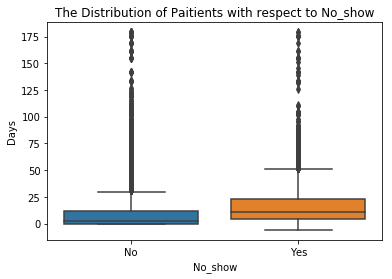

In [47]:
sns.boxplot(x='No_show',y='Days',data = df)
plt.title('The Distribution of Paitients with respect to No_show')
plt.show()

> From the analysis and plot above we can deduce that there is a relationship between show up and the number of days between the schedule date and appointment date, the closer the appointment day is from the schedule day, the more likely it is for the paitent to show up. 

### What effect does diesease have on show up rate?

In [48]:
#Grouping handicap patients by No_show
df.groupby('Handicap')['No_show'].count()

Handicap
0    108285
1      2042
Name: No_show, dtype: int64

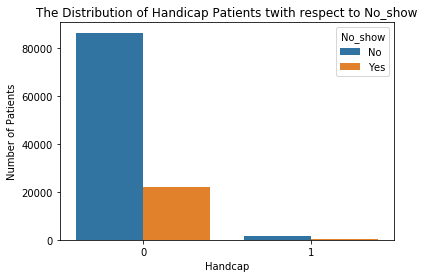

In [49]:
sns.countplot(x = 'Handicap', data = df, hue = 'No_show')
label('The Distribution of Handicap Patients twith respect to No_show', "Handcap", "Number of Patients")

> The number of paitents who are handicap are relatively less than those who are not handicap in the dataset.

> Also from the plot above we can deduce patients that are not handicap show up more for their appointment.

In [50]:
#Grouping Hypertension by No_show
df.groupby('Hypertension')['No_show'].count()

Hypertension
0    88611
1    21716
Name: No_show, dtype: int64

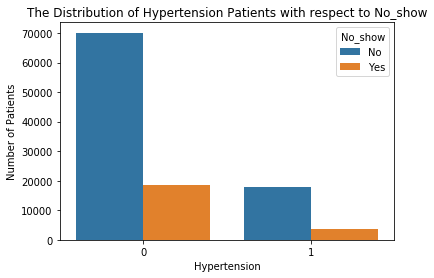

In [51]:
sns.countplot(x = 'Hypertension', data = df, hue = 'No_show')
label('The Distribution of Hypertension Patients with respect to No_show', "Hypertension", "Number of Patients")

> The number of paitent with hypertension that show up is less than the number paitent who do not have hypertension

In [52]:
#grouping Diabetes by No_show
df.groupby('Diabetes')['No_show'].count()

Diabetes
0    102427
1      7900
Name: No_show, dtype: int64

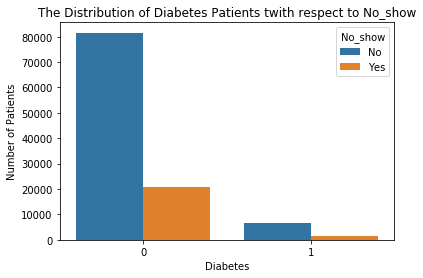

In [53]:
sns.countplot(x = 'Diabetes', data = df, hue = 'No_show')
label('The Distribution of Diabetes Patients twith respect to No_show', "Diabetes", "Number of Patients")

> Paitents with diabetes are less likely to show up to their appointment.

In [54]:
#Grouping alcoholism br no_show
df.groupby('Alcoholism')['No_show'].count()

Alcoholism
0    106975
1      3352
Name: No_show, dtype: int64

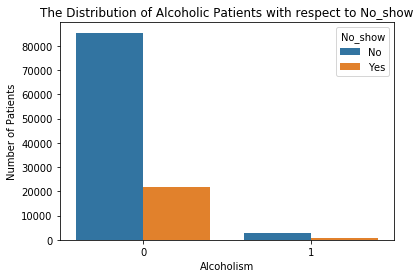

In [55]:
sns.countplot(x = 'Alcoholism', data = df, hue = 'No_show')
label('The Distribution of Alcoholic Patients with respect to No_show', "Alcoholism", "Number of Patients")

> Paitents that are alcoholic in nature tends to miss their appointments more

> The plots aboves infers that patients with dieases are less likely to show up to their appointment.

### What age group shows up most and least to their appointment?

In [56]:
df.Age.describe()

count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [57]:
#Grouping the age of paitents in various categories
Infants = df[df['Age'] <= 5]
Children = df.query ('6<= Age <= 12')
Teenager = df.query ('13<= Age <= 19')
Young_Aldut = df.query ('20<= Age <= 40')
Alduts = df.query('41<= Age <=60')
Old = df.query('61<= Age <=70')
Seniors = df[df['Age'] >= 81]

In [58]:
Infants.groupby('Age')['No_show'].count()

Age
0    3539
1    2273
2    1618
3    1513
4    1297
5    1489
Name: No_show, dtype: int64

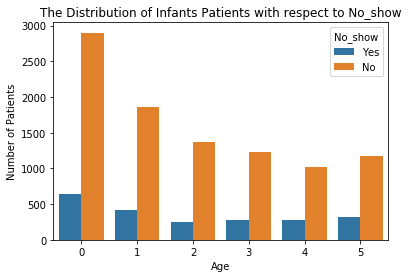

In [59]:
sns.countplot(x = 'Age', data = Infants, hue = 'No_show')
label('The Distribution of Infants Patients with respect to No_show', "Age", "Number of Patients")

> In the infant group, new babies are most likely to show up to their appointment.

In [60]:
#grouping the children group by No_show
Children.groupby('Age')['No_show'].count()

Age
6     1519
7     1424
8     1421
9     1371
10    1271
11    1191
12    1088
Name: No_show, dtype: int64

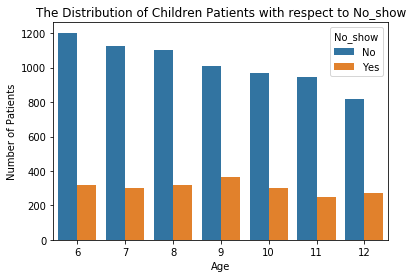

In [61]:
sns.countplot(x = 'Age', data = Children, hue = 'No_show')
label('The Distribution of Children Patients with respect to No_show', "Age", "Number of Patients")

> The plot above shows that an increase in the age of children causes a steady decline in the show up rate of the group.

In [62]:
Teenager.groupby('Age')['No_show'].count()

Age
13    1102
14    1117
15    1203
16    1398
17    1502
18    1483
19    1542
Name: No_show, dtype: int64

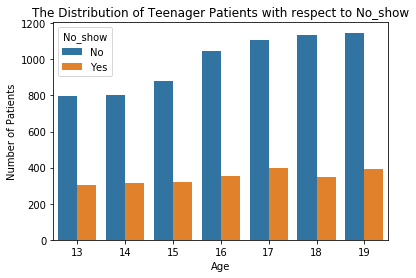

In [63]:
sns.countplot(x = 'Age', data = Teenager, hue = 'No_show')
label('The Distribution of Teenager Patients with respect to No_show', "Age", "Number of Patients")

> The plot above shows that older teenagers visits the hospital more hence they highestt age 19 has the highest show up rate.

In [64]:
#grouping the Young Alduts group by No_show
Young_Aldut.groupby('Age')['No_show'].count()

Age
20    1436
21    1451
22    1376
23    1349
24    1242
25    1328
26    1283
27    1377
28    1447
29    1397
30    1521
31    1437
32    1500
33    1516
34    1524
35    1377
36    1579
37    1530
38    1629
39    1535
40    1400
Name: No_show, dtype: int64

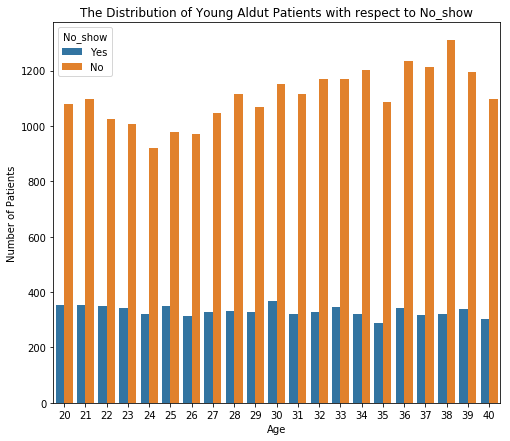

In [65]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Age', data = Young_Aldut, hue = 'No_show')
label('The Distribution of Young Aldut Patients with respect to No_show', "Age", "Number of Patients")

> The age with the highest show up rate in this category is age 38

In [66]:
#grouping the Young Alduts group by No_show
Alduts.groupby('Age')['No_show'].count()

Age
41    1344
42    1268
43    1344
44    1482
45    1451
46    1460
47    1393
48    1398
49    1649
50    1613
51    1561
52    1741
53    1651
54    1529
55    1422
56    1634
57    1603
58    1466
59    1622
60    1410
Name: No_show, dtype: int64

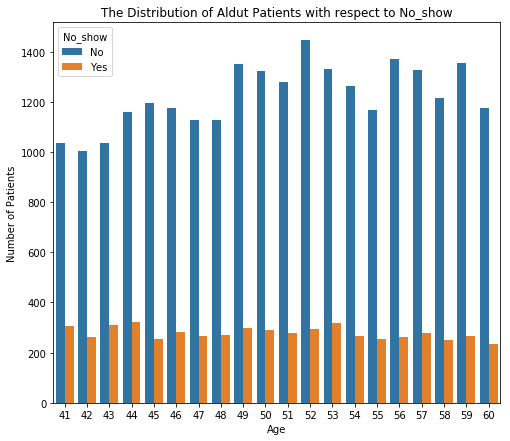

In [67]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Age', data = Alduts, hue = 'No_show')
label('The Distribution of Aldut Patients with respect to No_show', "Age", "Number of Patients")

> Patients aged 52 has the highest show up rate in this category

In [68]:
#grouping the old group by No_show
Old.groupby('Age')['No_show'].count()

Age
61    1343
62    1311
63    1373
64    1321
65    1100
66    1187
67     972
68    1011
69     830
70     719
Name: No_show, dtype: int64

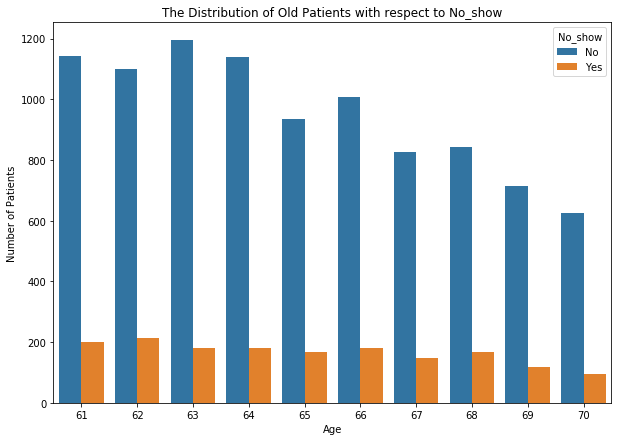

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Age', data = Old, hue = 'No_show')
label('The Distribution of Old Patients with respect to No_show', "Age", "Number of Patients")

> Patients age 63 tend to show up more than other ages in this category

In [70]:
#grouping the old group by No_show
Seniors.groupby('Age')['No_show'].count()

Age
81     432
82     383
83     278
84     306
85     272
86     260
87     184
88     125
89     161
90     108
91      65
92      86
93      53
94      32
95      24
96      17
97      10
98       6
99       1
100      4
102      2
115      5
Name: No_show, dtype: int64

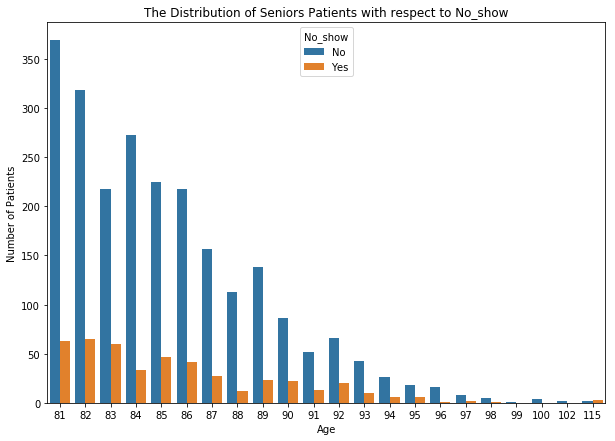

In [71]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Age', data = Seniors, hue = 'No_show')
label('The Distribution of Seniors Patients with respect to No_show', "Age", "Number of Patients")

> The plot shows that paitents aged 81 are more likely to show up to their appointment. 

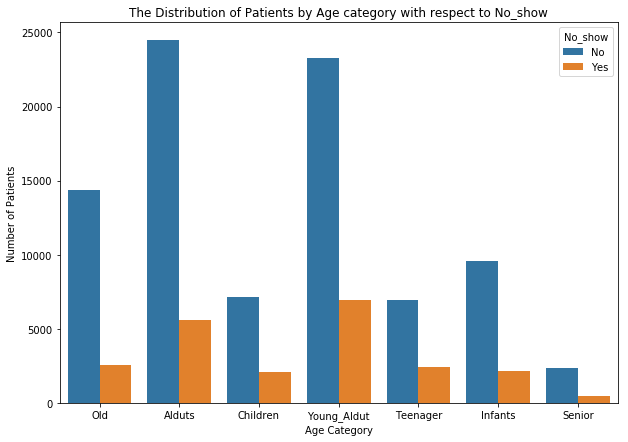

In [72]:
plt.figure(figsize=(10,7))
sns.countplot(df['Age Category'],hue = df['No_show'])
label('The Distribution of Patients by Age category with respect to No_show',"Age Category", "Number of Patients")

> The plot above tells us that paitents that fall in the aludut categor (41-60) are most likely to show up to their appointment.

### What factors are important for us to know in order to perdict if a patient shows up for their scheduled appointment?

> From the analysis conducted above, factors important to predict show up for their scheduled appointment are as follows:

> Appointment day

> Schedule day

> Diseases( Handicap, Hypertension, Diabetes,Alcoholism)

> Age 



<a id='conclusions'></a>
## Conclusions

> The results of this analysis are tentative however, we can conclude the following outputs;

> #### Question 1: What is the percentage of paitents wthat showed up as against those that did not show up ?
> The analysis show that 79.8% of the paitents show up to their appointments, while 20.2% of paitents do not show up to their appointment.

> #### Question 2: What gender visits the hospital most?
> The analysis carried out shows that the female gender visits the hospital more than the male gender. 

> #### Question 3: What gender shows up most for their appointment?
> The analysis conducted shows that females tends to show up more to their appointments than males.

> #### Question 4: What effect does scholarship have on patient show up rate? 
> Paitents without scholarship tend to show up more than those with scholarship, this could be as a result of the free medical care recieved by those covered by the scholarship that makes the paitents less likely to commit to their appointment day.

> #### Question 5:What effect does sending SMS have on patients showing up to their appointment?
> SMS alerts have little to no effect on the show up of paitents

> #### Question 6: What  effect does disease have on show up rate of paitents?
> Paitents who have diseases (Diabetes, hypertension, alcoholsim, Hnadicap) show up less than healthy paitents.

> #### Question 7: What effect does the difference in the schedule day and appointment day have on show up rate?
> The length of the waiting days is an important factor in show up of paitents as the analysis show that paitents with closer appointment date tend to show up more than those with further days.

> #### Question 8: What age group shows up most and least to their appointment?
> Patients that fall into the category of 'Alduts' (41-60) show up more to their appointments more than other age groups, while paitients that fall into the young adults(20-40) category are least likely to show up to their appointment.

> #### Question 9: What factors are important for us to know in order to perdict if a patient shows up for their scheduled appointment?
> From the analysis conducted the factors that can be use to predict paitiennts show up are; Appointment day, Schedule day, Diseases( Handicap, Hypertension, Diabetes,Alcoholism) and Age 

## Limitations
>1. The data collcetd has more female sample than the male sample, this can lead to a biases in the analysis.
>2. The data collected does not explore the factors that can infer paitent show up to their scheduled days, hence leaving us with assumptions.

<a id='References'></a>
### References

>Zach, September 2021, 'How to Rename Columns in Pandas (With Examples)', <https://www.statology.org/pandas-rename-columns/>

>Michael Waskom, 2018, 'An introduction to seaborn', <http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/introduction.html>

>  Isshin Inada, July 1, 2022, <https://www.skytowner.com/explore/creating_new_column_using_if_elif_and_else_in_pandas_dataframe>

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0